In [7]:
import pandas as pd
df=pd.read_csv('trained_dataset_train.csv')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S
885,1,1,female,19.0,0,0,30.0000,S
886,0,3,female,22.5,1,2,23.4500,S
887,1,1,male,26.0,0,0,30.0000,C


In [9]:
df[df.select_dtypes(['object']).columns]=df.select_dtypes(['object']).apply(lambda x:pd.factorize(x)[0])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
884,0,2,0,27.0,0,0,13.0000,0
885,1,1,1,19.0,0,0,30.0000,0
886,0,3,1,22.5,1,2,23.4500,0
887,1,1,0,26.0,0,0,30.0000,1


In [11]:
import numpy as np
X=df.values
print(X)
Y=df['Survived'].values
Y

[[ 0.      3.      0.     ...  0.      7.25    0.    ]
 [ 1.      1.      1.     ...  0.     71.2833  1.    ]
 [ 1.      3.      1.     ...  0.      7.925   0.    ]
 ...
 [ 0.      3.      1.     ...  2.     23.45    0.    ]
 [ 1.      1.      0.     ...  0.     30.      1.    ]
 [ 0.      3.      0.     ...  0.      7.75    2.    ]]


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [13]:
X=np.delete(X,0,axis=1)
X

array([[ 3.    ,  0.    , 22.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 1.    ,  1.    , 38.    , ...,  0.    , 71.2833,  1.    ],
       [ 3.    ,  1.    , 26.    , ...,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    ,  1.    , 22.5   , ...,  2.    , 23.45  ,  0.    ],
       [ 1.    ,  0.    , 26.    , ...,  0.    , 30.    ,  1.    ],
       [ 3.    ,  0.    , 32.    , ...,  0.    ,  7.75  ,  2.    ]])

# Training

In [15]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test=train_test_split(X, Y, test_size=0.2,random_state=0)


In [17]:
print("The x train is",len(X_Train))
print("the x test is",len(X_Test))
print("the y train is",len(Y_Train))
print("the y test is",len(Y_Test))

The x train is 711
the x test is 178
the y train is 711
the y test is 178


In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear',random_state=0)

In [21]:
model.fit(X_Train,Y_Train)

LogisticRegression(random_state=0, solver='liblinear')

In [17]:
model.classes_

array([0, 1], dtype=int64)

In [19]:
model.intercept_

array([1.69020456])

In [21]:
model.coef_

array([[-0.99198087,  2.84523921, -0.04090038, -0.32690833, -0.08844199,
         0.00391265,  0.5111411 ]])

# Testing

In [23]:
y_pred=model.predict(X_Test)
print(y_pred)
print(  )
print(Y_Test)

[1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1]

[0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1]


# Accuracy

In [25]:
accuracy=model.score(X_Test,Y_Test)
print(accuracy)

0.7134831460674157


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_Test,y_pred)

array([[84, 21],
       [30, 43]], dtype=int64)

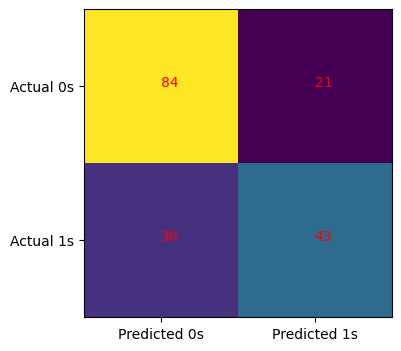

In [35]:
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_Test,y_pred)
fig,ax=plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], color='red')
plt.show()        


In [33]:
report=classification_report(Y_Test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       105
           1       0.67      0.59      0.63        73

    accuracy                           0.71       178
   macro avg       0.70      0.69      0.70       178
weighted avg       0.71      0.71      0.71       178

